In [1]:
# Installing the openpyxl package (required for reading Excel files)
!pip install openpyxl

# Importing necessary libraries
import pandas as pd  # For data analysis and manipulation
import numpy as np  # For numerical computations and array operations
import matplotlib.pyplot as plt  # For data visualization

In [2]:
# Defining the file path to the Excel file
file_path = r'C:\Users\tevfi\Desktop\Ironhack\miniproject2\GSAF5.xls'

# Reading the Excel file into a pandas DataFrame
shark_attacks_df = pd.read_excel(file_path)

# Displaying the first 5 rows of the DataFrame
shark_attacks_df.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-01 00:00:00,2024.0,Unprovoked,Hawaii,Maui,Sand Piles Waiehu Beach Park,Surfing,Kenji,M,61,...,Not stated,Glen Folkard: Independent: Fox News: Sky News ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-31 00:00:00,2024.0,Unprovoked,Australia,Queensland,Whitsunday Islands,Snorkeling,Not stated,F,57,...,Reported as a large Tiger shark,Simon de Marchi: 9 News: 7 News: ABC News:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-25 00:00:00,2024.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Surfing,Cole Taschman,M,27,...,Bull or tiger 7-8ft,Bob Myatt: Yardbarker: 12 on your side: WPTV: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,...,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping unnecessary columns from the DataFrame
shark_attacks_df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 11', 'href', 'href formula', 'pdf', 'original order', 'Case Number.1', 'Case Number'], axis=1, inplace=True)


In [7]:
# Displaying the current column names of the DataFrame
shark_attacks_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species ', 'Source'],
      dtype='object')

In [8]:
# Displaying a random sample of 10 entries from the 'Date' column to check its format
shark_attacks_df['Date'].sample(10)


2553             07-Sep-2001
4150                    1968
2320             22-May-2004
6480                Ca. 1881
1453             20-Mar-2012
5863             16-Oct-1923
1922    Reported 09-Apr-2008
3012             28-Jul-1995
1982             04-Sep-2007
1986             28-Aug-2007
Name: Date, dtype: object

In [9]:
# Converting the 'Date' column to datetime format, coercing any errors to NaT (Not a Time)
shark_attacks_df['Date'] = pd.to_datetime(shark_attacks_df['Date'], errors='coerce')

# Displaying the updated 'Date' column to confirm the conversion
display(shark_attacks_df['Date'])

0             NaT
1      2024-11-01
2      2024-10-31
3      2024-10-25
4      2024-10-14
          ...    
6972          NaT
6973          NaT
6974          NaT
6975          NaT
6976          NaT
Name: Date, Length: 6977, dtype: datetime64[ns]

In [12]:
# Displaying a random sample of 10 entries from the 'Date' column to confirm the conversion to datetime format
shark_attacks_df['Date'].sample(10)

6932          NaT
3183   1992-09-11
6135          NaT
6688   1852-02-26
2437   2003-04-15
3000   1995-08-25
4300   1965-01-10
2762   1999-07-21
2017   2007-06-24
248    2022-01-01
Name: Date, dtype: datetime64[ns]

In [15]:
# Counting the number of unique dates in the 'Date' column
date_count = shark_attacks_df['Date'].nunique()

# Printing the count of unique dates
print(date_count)


5168


In [16]:
# Counting the number of missing (NaT) values in the 'Date' column after conversion
null_date_count = shark_attacks_df['Date'].isnull().sum()

# Printing the count of missing dates
print(null_date_count)


876


In [17]:
# Dropping rows where the 'Date' column has missing values (NaT)
shark_attacks_df = shark_attacks_df.dropna(subset=['Date'])


In [18]:
# Displaying the shape of the DataFrame (number of rows and columns)
shark_attacks_df.shape


(6101, 14)

In [19]:
# Confirming that there are no more missing values in the 'Date' column after dropping rows
shark_attacks_df['Date'].isnull().sum()


0

In [20]:
# Extracting the month from the 'Date' column and creating a new 'Month' column
shark_attacks_df['Month'] = shark_attacks_df['Date'].dt.month


In [21]:
# Displaying the first 5 rows of the updated DataFrame to confirm the addition of the 'Month' column
shark_attacks_df.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,Month
1,2024-11-01,2024.0,Unprovoked,Hawaii,Maui,Sand Piles Waiehu Beach Park,Surfing,Kenji,M,61,Right leg severted below knee,?,Not stated,Glen Folkard: Independent: Fox News: Sky News ...,11
2,2024-10-31,2024.0,Unprovoked,Australia,Queensland,Whitsunday Islands,Snorkeling,Not stated,F,57,30cm (1ft) bite to lower calf,16.30hrs,Reported as a large Tiger shark,Simon de Marchi: 9 News: 7 News: ABC News:,10
3,2024-10-25,2024.0,Unprovoked,USA,Florida,"Bathtub Beach, Martin County",Surfing,Cole Taschman,M,27,Both feet bitten,AM,Bull or tiger 7-8ft,Bob Myatt: Yardbarker: 12 on your side: WPTV: ...,10
4,2024-10-14,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,Back and thigh extensive tissue loss,?,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,10
5,2024-10-11,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,10


In [22]:
# Grouping the data by 'Month' and counting the number of occurrences for each month
month_counts = shark_attacks_df['Month'].value_counts().sort_index()

# Displaying the counts for each month
month_counts


Month
1     798
2     380
3     420
4     449
5     413
6     491
7     696
8     602
9     542
10    458
11    412
12    440
Name: count, dtype: int64

In [23]:
# Counting missing values in the 'Country' and 'Month' columns
print(shark_attacks_df[['Country', 'Month']].isnull().sum())


Country    28
Month       0
dtype: int64


In [24]:
# Dropping rows where the 'Country' column has missing values
shark_attacks_df.dropna(subset=['Country'], inplace=True)


In [25]:
# Cleaning and standardizing the 'Country' column
shark_attacks_df['Country'] = shark_attacks_df['Country'].str.strip().str.title()


In [26]:
# Defining a list of countries to focus on for analysis
countries_to_analyze = ['Australia', 'Mexico', 'South Africa', 'Portugal']

# Filtering the DataFrame to include only the specified countries
shark_attacks_df_filtered = shark_attacks_df[shark_attacks_df['Country'].isin(countries_to_analyze)]

# Grouping the filtered data by 'Country' and 'Month' and counting the occurrences
monthly_counts = shark_attacks_df_filtered.groupby(['Country', 'Month']).size().unstack(fill_value=0)

# Displaying the resulting DataFrame with counts of shark attacks by country and month
monthly_counts


Month,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Australia,235,146,127,108,59,61,51,54,60,99,141,179
Mexico,8,4,6,8,10,6,10,6,7,5,7,8
Portugal,0,0,0,0,0,1,1,1,0,0,0,1
South Africa,125,55,51,48,39,27,37,24,22,29,37,68


In [27]:
# Counting the occurrences of each country in the dataset
country_count = shark_attacks_df["Country"].value_counts()

# Extracting the counts for the selected countries
selected_countries = country_count[countries_to_analyze]

# Printing the counts for the specified countries
print(selected_countries)


Country
Australia       1320
Mexico            85
South Africa     562
Portugal           4
Name: count, dtype: int64


In [28]:
# Importing the seaborn library for advanced data visualization
import seaborn as sns


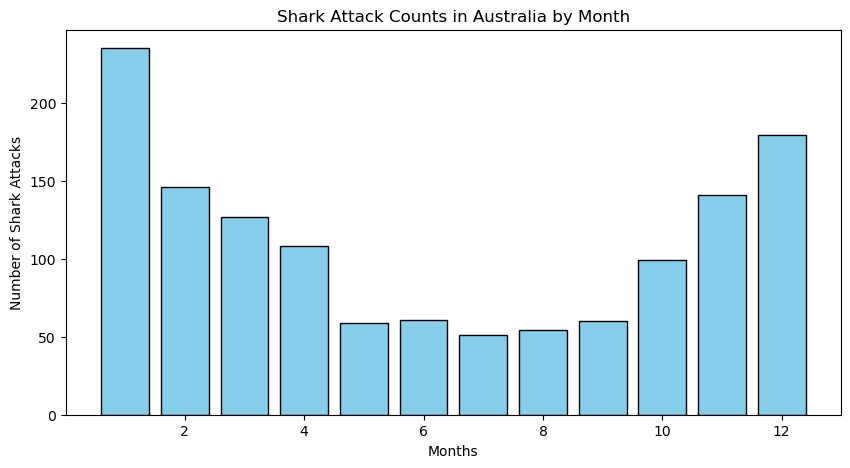

In [29]:
# Defining the months (1 for January, 2 for February, etc.)
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # X positions for each month

# Defining the number of shark attacks in Australia for each month
australia_counts = [235, 146, 127, 108, 59, 61, 51, 54, 60, 99, 141, 179]  # Heights of bars for Australia

# Setting the size of the figure
plt.figure(figsize=(10, 5))

# Adding title and labels to the plot
plt.title('Shark Attack Counts in Australia by Month')
plt.xlabel('Months')
plt.ylabel('Number of Shark Attacks')

# Creating a bar plot to show the number of shark attacks by month in Australia
plt.bar(months, australia_counts, color='skyblue', edgecolor='black', label='Australia')

# Displaying the plot
plt.show()


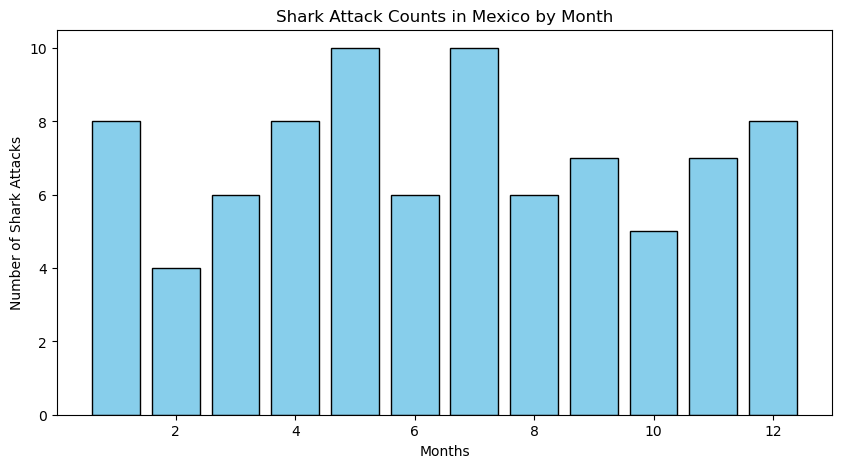

In [30]:
# Defining the months (1 for January, 2 for February, etc.)
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Defining the number of shark attacks in Mexico for each month
mexico_counts = [8, 4, 6, 8, 10, 6, 10, 6, 7, 5, 7, 8]

# Setting the size of the figure
plt.figure(figsize=(10, 5))

# Adding title and labels to the plot
plt.title('Shark Attack Counts in Mexico by Month')
plt.xlabel('Months')
plt.ylabel('Number of Shark Attacks')

# Creating a bar plot to show the number of shark attacks by month in Mexico
plt.bar(months, mexico_counts, color='skyblue', edgecolor='black', label='Mexico')

# Displaying the plot
plt.show()


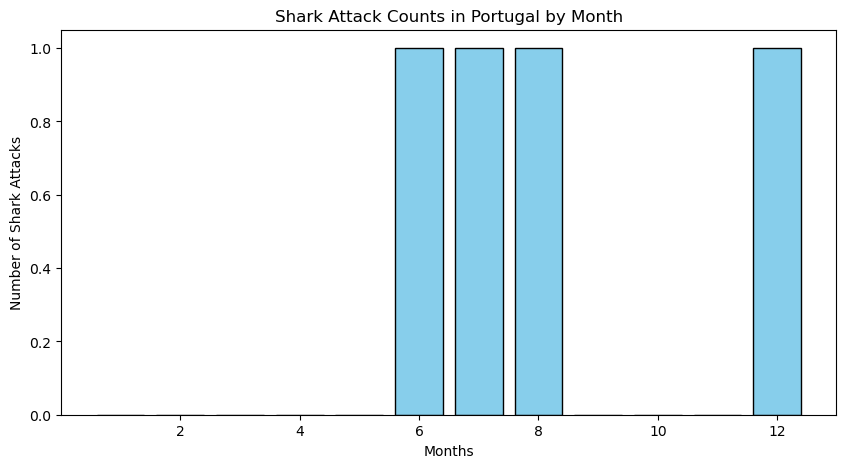

In [31]:
# Defining the months (1 for January, 2 for February, etc.)
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Defining the number of shark attacks in Portugal for each month
portugal_counts = [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]

# Setting the size of the figure
plt.figure(figsize=(10, 5))

# Adding title and labels to the plot
plt.title('Shark Attack Counts in Portugal by Month')
plt.xlabel('Months')
plt.ylabel('Number of Shark Attacks')

# Creating a bar plot to show the number of shark attacks by month in Portugal
plt.bar(months, portugal_counts, color='skyblue', edgecolor='black', label='Portugal')

# Displaying the plot
plt.show()


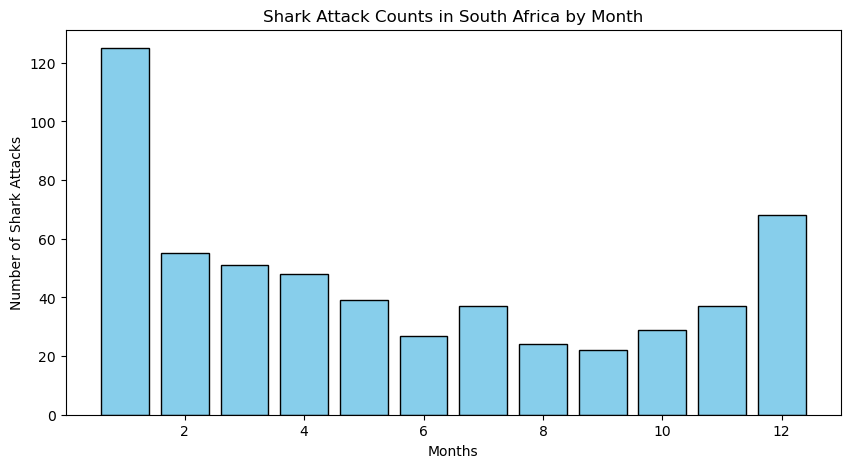

In [32]:
# Defining the months (1 for January, 2 for February, etc.)
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Defining the number of shark attacks in South Africa for each month
south_africa_counts = [125, 55, 51, 48, 39, 27, 37, 24, 22, 29, 37, 68]

# Setting the size of the figure
plt.figure(figsize=(10, 5))

# Adding title and labels to the plot
plt.title('Shark Attack Counts in South Africa by Month')
plt.xlabel('Months')
plt.ylabel('Number of Shark Attacks')

# Creating a bar plot to show the number of shark attacks by month in South Africa
plt.bar(months, south_africa_counts, color='skyblue', edgecolor='black', label='South Africa')

# Displaying the plot
plt.show()


Summary of Findings

General Trends Across Countries:

Australia had the highest number of shark attacks, with a noticeable peak in the summer months (December and January).
In contrast, shark attacks in Portugal were extremely rare, with only a handful of incidents reported during the summer.
Mexico showed a relatively steady number of shark attacks throughout the year, with slight increases in May and July.
South Africa showed a significant spike in January and a steady decline through the winter months (June to August).

Seasonality Observations:

Shark attacks appear to be more frequent during the warmer months (December to February) in Australia and South Africa.
This trend could be linked to higher human activity in the water during the summer holidays, leading to a greater chance of encounters.
In Mexico, the attacks were more evenly distributed, suggesting less seasonality.

Noteworthy Insights:

The data shows that South Africa has a significant drop in shark attacks during the winter months (June to August).
Portugal only had recorded attacks during the summer, indicating a strong correlation with warmer months.

Limitations of the Data:

Some of the data entries had missing or incorrect date information, which may impact the accuracy of the monthly analysis.
The dataset is limited to reported attacks, so the actual number of shark encounters might be higher.

Conclusions and Recommendations

Shark attacks tend to be more frequent during the warmer months, especially in Australia and South Africa.
Public awareness campaigns could focus on the peak months to reduce incidents.
Future research could explore correlations between shark activity and environmental factors such as water temperature or beach crowd levels.